<p align="center"><img src="https://raw.githubusercontent.com/IntelRealSense/librealsense/master/doc/img/realsense.png" width="70%" /><br><br></p>

## Getting the Data
This notebook showcases simple scene involving different materials - transparent aquarium walls and water. Depth from stereo as a technology is robuts to working underwater. 

In [1]:
# !wget -N https://librealsense.intel.com/rs-tests/TestData/depth_under_water.bag
print("Data is Ready")

Data is Ready


'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In order to extract and visualise the data we will need to import python libraries:

In [2]:
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


## Capturing Frames
Next, we will open depth and RGB streams from pre-recorded file and capture a set of frames:

In [3]:
# Setup:
pipe = rs.pipeline()
cfg = rs.config()
cfg.enable_device_from_file("depth_under_water.bag")
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

# Cleanup:
pipe.stop()
print("Frames Captured")

Frames Captured


## Visualising the Data
The following code will align the two frames and visualise them together:

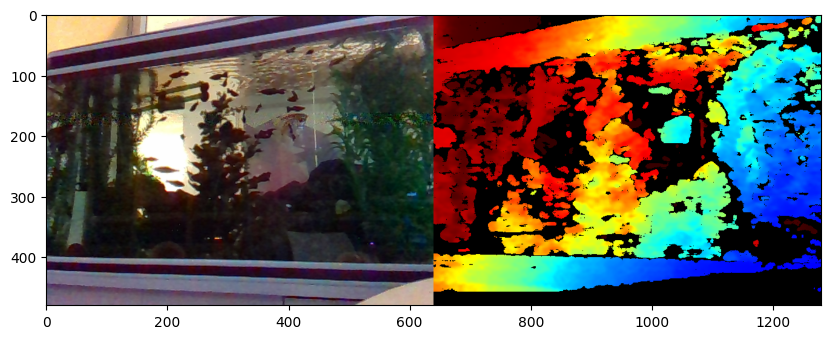

In [4]:
color = np.asanyarray(color_frame.get_data())
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())

# Create alignment primitive with color as its target stream:
align = rs.align(rs.stream.color)
aligned_frameset = align.process(frameset)

# Update color and depth frames:
aligned_depth_frame = aligned_frameset.get_depth_frame()
colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())

# Show the two frames together:
images = np.hstack((color, colorized_depth))
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(images)

> **Want to learn more?** Visit [realsense.intel.com](http://realsense.intel.com) and [github.com/IntelRealSense](http://www.github.com/IntelRealSense/librealsense)